## Analyzing my Wechat freinds instant basic data

Try to analyse the social data of my Wechat friends through itchat, such as sex distribution and regional distribution.And it might be more intuitive to visual the analysis results here. 

In [86]:
import itchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from pandas import DataFrame
from matplotlib.patches import Polygon

In [87]:
# log in my wechat account.

itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as ¥


gender distribution of my Wechat friends.

In [88]:
friends=itchat.get_friends(update=True)[0:]
male=female=other=0
for i in friends[1:]:
 sex=i['Sex']
 if sex==1:
  male+=1
 elif sex==2:
  female+=1
 else:
  other+=1
    
total=len(friends[1:])
malecol=round(float(male)/total*100,2)
femalecol=round(float(female)/total*100,2)
othercol=round(float(other)/total*100,2)
print('male：%.2f%%' %(malecol)+'\n'+
'female:%.2f%%' % (femalecol)+'\n'+
'other：%.2f%%' %(othercol))

male：57.89%
female:37.05%
other：5.05%


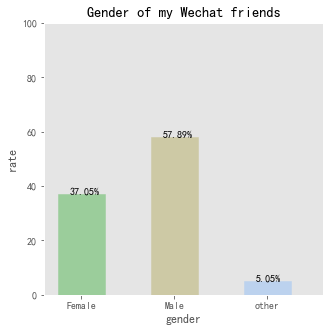

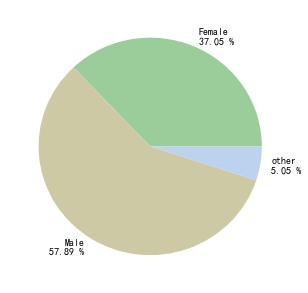

In [89]:
mpl.style.use('ggplot')
mpl.rcParams['font.sans-serif'] = ['SimHei']  
mpl.rcParams['axes.unicode_minus'] = False 
  
map = {
 'Female': (femalecol, '#9BCD9B'),
 'Male': (malecol, '#CDC9A5'),
 'other': (othercol, '#BCD2EE')
}
  
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_title('Gender of my Wechat friends')
  
xticks = np.arange(3)+0.15
bar_width = 0.5
names = map.keys()
values = [x[0] for x in map.values()]
colors = [x[1] for x in map.values()]
  
bars = ax.bar(xticks, values, width=bar_width, edgecolor='none')
ax.set_ylabel('rate')
ax.set_xlabel('gender')
ax.grid()
ax.set_xticks(xticks)
ax.set_xticklabels(names)
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])
ax.set_ylim([0, 100])
for bar, color in zip(bars, colors):
 bar.set_color(color)
 height=bar.get_height()
 plt.text(bar.get_x()+bar.get_width()/4.,height,'%.2f%%' %float(height))
plt.show()


fig1 = plt.figure(figsize=(5,5))
ax = fig1.add_subplot(111)

labels = ['{}\n{} %'.format(name, value) for name, value in zip(names, values)]
ax.pie(values, labels=labels, colors=colors)
plt.show()

In [90]:
# then get other data through itchat.

def get_var(var):
 variable=[]
 for i in friends:
  value=i[var]
  variable.append(value)
 return variable
  
NickName=get_var('NickName')
Sex=get_var('Sex')
Province=get_var('Province')
City=get_var('City')
Signature=get_var('Signature')

pros=set(Province)
prosarray=[]
for item in pros:
 prosarray.append((item,Province.count(item)))
def by_num(p):
 return p[1]
prosdsored=sorted(prosarray,key=by_num,reverse=True)

Use bar chart here to show us the number of cities that my Wechat friends live in.

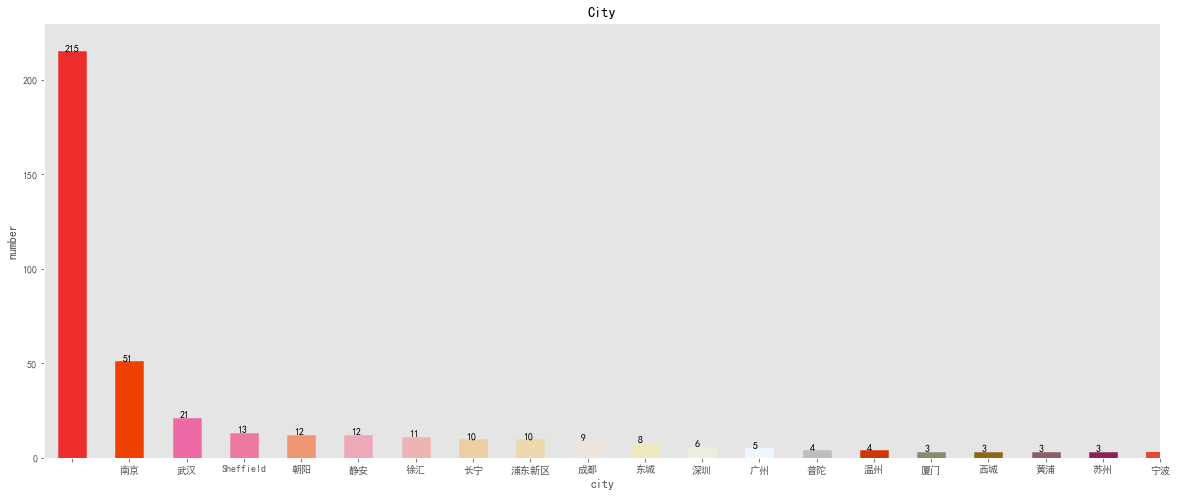

In [91]:
# get city data.

City=get_var('City')
pros=set(City)
prosarray=[]
for item in pros:
 prosarray.append((item,City.count(item)))
def by_num(p):
 return p[1]
prosdsored=sorted(prosarray,key=by_num,reverse=True)

# bar chart
figpro = plt.figure(figsize=(10,5))
axpro = figpro.add_subplot(111)
axpro.set_title('City')
xticks = np.linspace(0.5,20,20)
bar_width = 0.5
pros=[]
values = []
count=0
for item in prosdsored:
 pros.append(item[0])
 values.append(item[1])
 count=count+1
 if count>=20:
  break
  
colors = ['#EE2C2C','#EE4000','#EE6AA7','#EE799F','#EE9572','#EEA9B8','#EEB4B4','#EECFA1','#EED8AE','#EEE5DE','#EEE9BF','#EEEEE0','#F0F8FF','#BEBEBE','#CD3700','#8B8970','#8B6914','#8B5F65','#8B2252']
  
bars = axpro.bar(xticks, values, width=bar_width, edgecolor='none')
axpro.set_ylabel('number')
axpro.set_xlabel('city')
axpro.grid()
axpro.set_xticks(xticks)# 
axpro.set_xticklabels(pros)
axpro.set_xlim(0,20)
axpro.set_ylim([0, 230])

for bar, color in zip(bars, colors):
 bar.set_color(color)
 height=bar.get_height()
 plt.text(bar.get_x()+bar.get_width()/4.,height,'%.d' %float(height))
plt.gcf().set_size_inches(20,8)  
plt.show()

<img src="https://raw.githubusercontent.com/mmeagher/ARC6818-2017/master/images/t1.jpg"
style="width:1000px;height:30px;float:left">

↑ We can see that most of my Wechat friends(215) hide their locations or didn't fill in their city information.

↓ Download my Wechat friends' basic information, and save as csv file in my computer .

In [96]:
data={'NickName':NickName,'Sex':Sex,'Province':Province,'City':City,'Signature':Signature}
frame=DataFrame(data)

frame.to_csv('geQIANwechatdata.csv',index=True)

In [97]:
# Read geQIANwechatdata.csv

df1 = pd.read_csv('geQIANwechatdata.csv', header=0)

In [98]:
df1

,Unnamed: 0,City,NickName,Province,Sex,Signature
0,0,NaN,¥,NaN,2,NaN
1,1,NaN,志 明,NaN,1,www.linchiu.com
2,2,普陀,严吉,上海,1,NaN
3,3,NaN,🔪,NaN,0,NaN
4,4,长宁,OnoLiZi,上海,2,送你一颗子弹
5,5,NaN,Wei,上海,1,NaN
6,6,NaN,栾龙magicink,NaN,1,每天都在杀人与不杀人之间徘徊！
7,7,南京,in little house,江苏,1,NaN
8,8,乌鲁木齐,吉的匕,新疆,1,Too ugly to die
9,9,武汉,假摇滚,湖北,1,懂取舍，知进退


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
Unnamed: 0    476 non-null int64
City          261 non-null object
NickName      475 non-null object
Province      325 non-null object
Sex           476 non-null int64
Signature     309 non-null object
dtypes: int64(2), object(4)
memory usage: 22.4+ KB


How many uni classmates on my Wechat?

In [100]:
sheffield_sum = df1['City'][df1['City'] == 'Sheffield'].count()
print(sheffield_sum)

13


How many Wechat friends live in my hometown?

In [101]:
南京_sum = df1['City'][df1['City'] == '南京'].count()
print(南京_sum)

51


Prepare for map stuff, download chinese map from http://www.gadm.org/country ( cos most of my Wechat friends live in China).

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


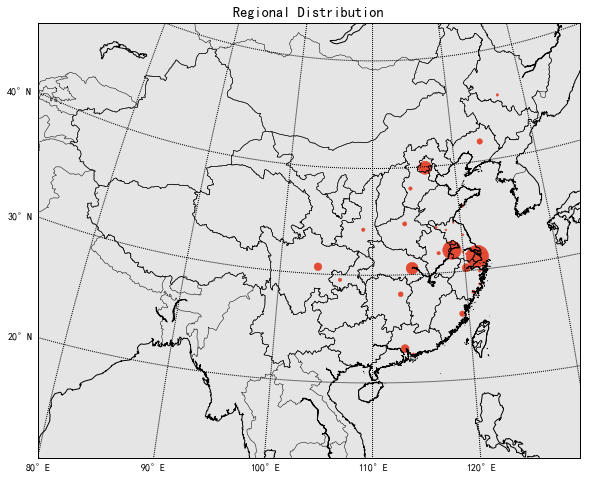

In [102]:
import urllib
mpl.rcParams['toolbar'] = 'None'
from  matplotlib.animation import FuncAnimation
import seaborn as sns

posi=pd.read_excel("C:\\Users\\QIAN\\Desktop\\python\\a5\\geQIANwechatdata2.xlsx")
lat = np.array(posi["lat"][0:120])                        
lon = np.array(posi["lon"][0:120])                        
pc = np.array(posi["pc"][0:120],dtype=float) 
size=(pc/np.max(pc))*500   
map = Basemap(projection='stere', 
              lat_0=35, lon_0=110,
              llcrnrlon=80, 
              llcrnrlat=10, 
              urcrnrlon=140, 
              urcrnrlat=50,resolution='l',area_thresh=10000,rsphere=6371200.)


map.drawcoastlines()   
map.drawcountries()    
map.drawcounties()
map.readshapefile("C:\\Users\\QIAN\\Desktop\\python\\CHN_adm_shp\\CHN_adm1",'states',drawbounds=True)
map.readshapefile("C:\\Users\\QIAN\\Desktop\\python\\TWN_adm_shp\\TWN_adm1",'states',drawbounds=True)
map.drawmapboundary()



parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) 

meridians = np.arange(80.,140.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) 
x,y = map(lon,lat)

map.scatter(x,y,s=size)
plt.gcf().set_size_inches(20,8)
plt.title("Regional Distribution")
plt.show()

Most of my Wechat friends live in the southeast China, especially Shanghai and Jiangsu Province which is my hometowm. 

In [103]:
# here is the list of all regional information of all my Wechat friends.
df1.Province.value_counts()

上海                    84
江苏                    57
北京                    29
湖北                    24
England               15
浙江                    11
广东                    11
四川                    10
辽宁                     5
福建                     5
山东                     4
湖南                     4
其他                     3
河南                     3
California             3
Taipei                 2
香港                     2
台湾                     2
陕西                     2
安徽                     2
重庆                     2
新疆                     1
Viedma                 1
IE                     1
Wakayama               1
Madrid                 1
Okinawa                1
Firenze                1
Cape Town              1
Georgia                1
                      ..
Vienna                 1
Bangkok                1
Marseille              1
New Taipei City        1
Okayama                1
Rotterdam              1
Dubayy                 1
Kanchanaburi           1
Tokyo                  1


Through this assignment， I find that most of my Wechat friends are live in Shanghai where I worked and lived in during the past three years. And more male Wechat friends than female friends, I guess one of the reasons is more male study and work in Architecture now. 